In [1]:
#importing important library's 

import pandas as pd                                                   # import pandas
import numpy as np                                                    # import numpy
import matplotlib.pyplot as plt                                       # plotting imports
import seaborn as sns                                                 # plotting import
from xgboost import XGBClassifier                                     # importing XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier                    # import KNeighborsClassifier        
from sklearn import svm                                               # support vector model Classifier
from sklearn.model_selection import train_test_split                  # import train_test_split for splitting Data
from sklearn import metrics                                           # model metrics
from sklearn.metrics import accuracy_score                            # import for checking accuracy_score 
from sklearn.preprocessing import StandardScaler                      # importing StandardScaler(Perprossing)
from sklearn.metrics import confusion_matrix                          # confusion matrix 
from sklearn.metrics import f1_score                                  # importing f1_score      
from skfeature.function.similarity_based import fisher_score          # Fisher scores (Feature selection)
#allows matplotlib plots to be displayed directly in the notebook interface
%matplotlib inline                    

# import dataset
data = pd.read_csv("/Users/shivanshkatoch/Downloads/Parkinsson disease.csv")



In [2]:
# view the dataset data
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# dataset dimensions
data.shape

(195, 24)

In [4]:
# generate descriptive statistics
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
# inspect the values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# delete the name column
data.drop(columns="name", axis=1, inplace=True)

In [7]:
# check for null values
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# FEATURES -  selecting data except for name and status  
X = data.loc[:,data.columns!='status'].values[:,1:] 
x = data.loc[:,data.columns!='status']
# LABELS -  selecting only status 
Y = data.loc[:,'status'].values
y = data.loc[:,'status']

In [9]:
x.describe() #it does not contain status of patient

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
y.describe() #it only contain status of patient

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

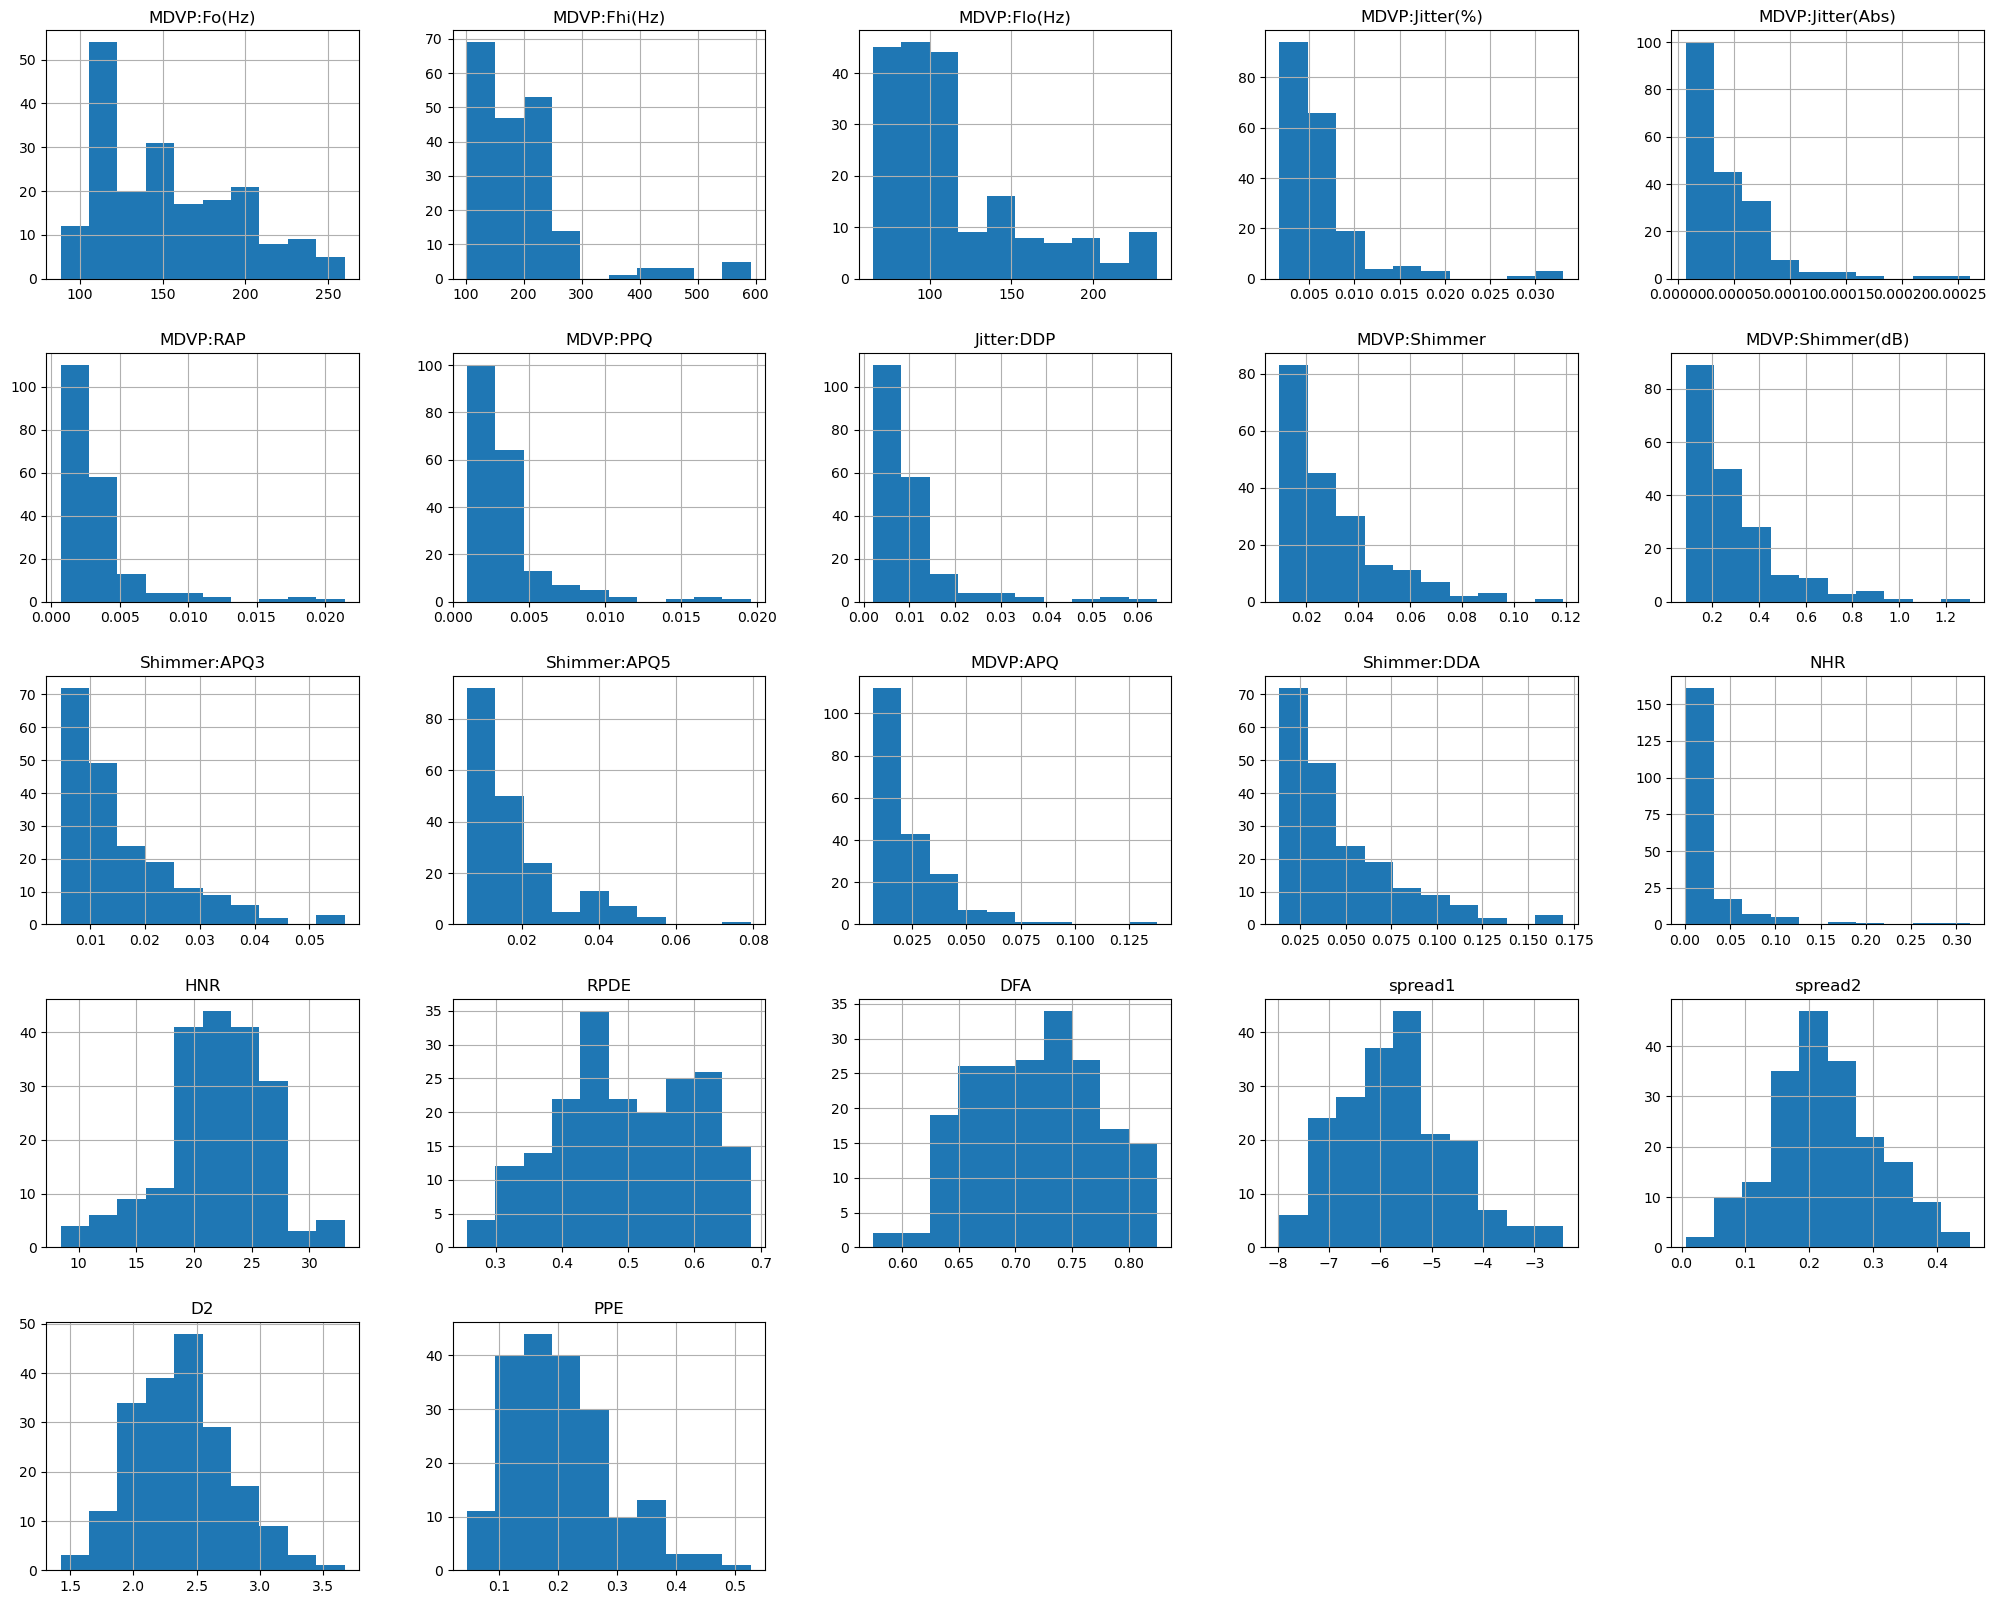

In [11]:
# analyzing the features 
x.hist(figsize=(25,20))
plt.show()

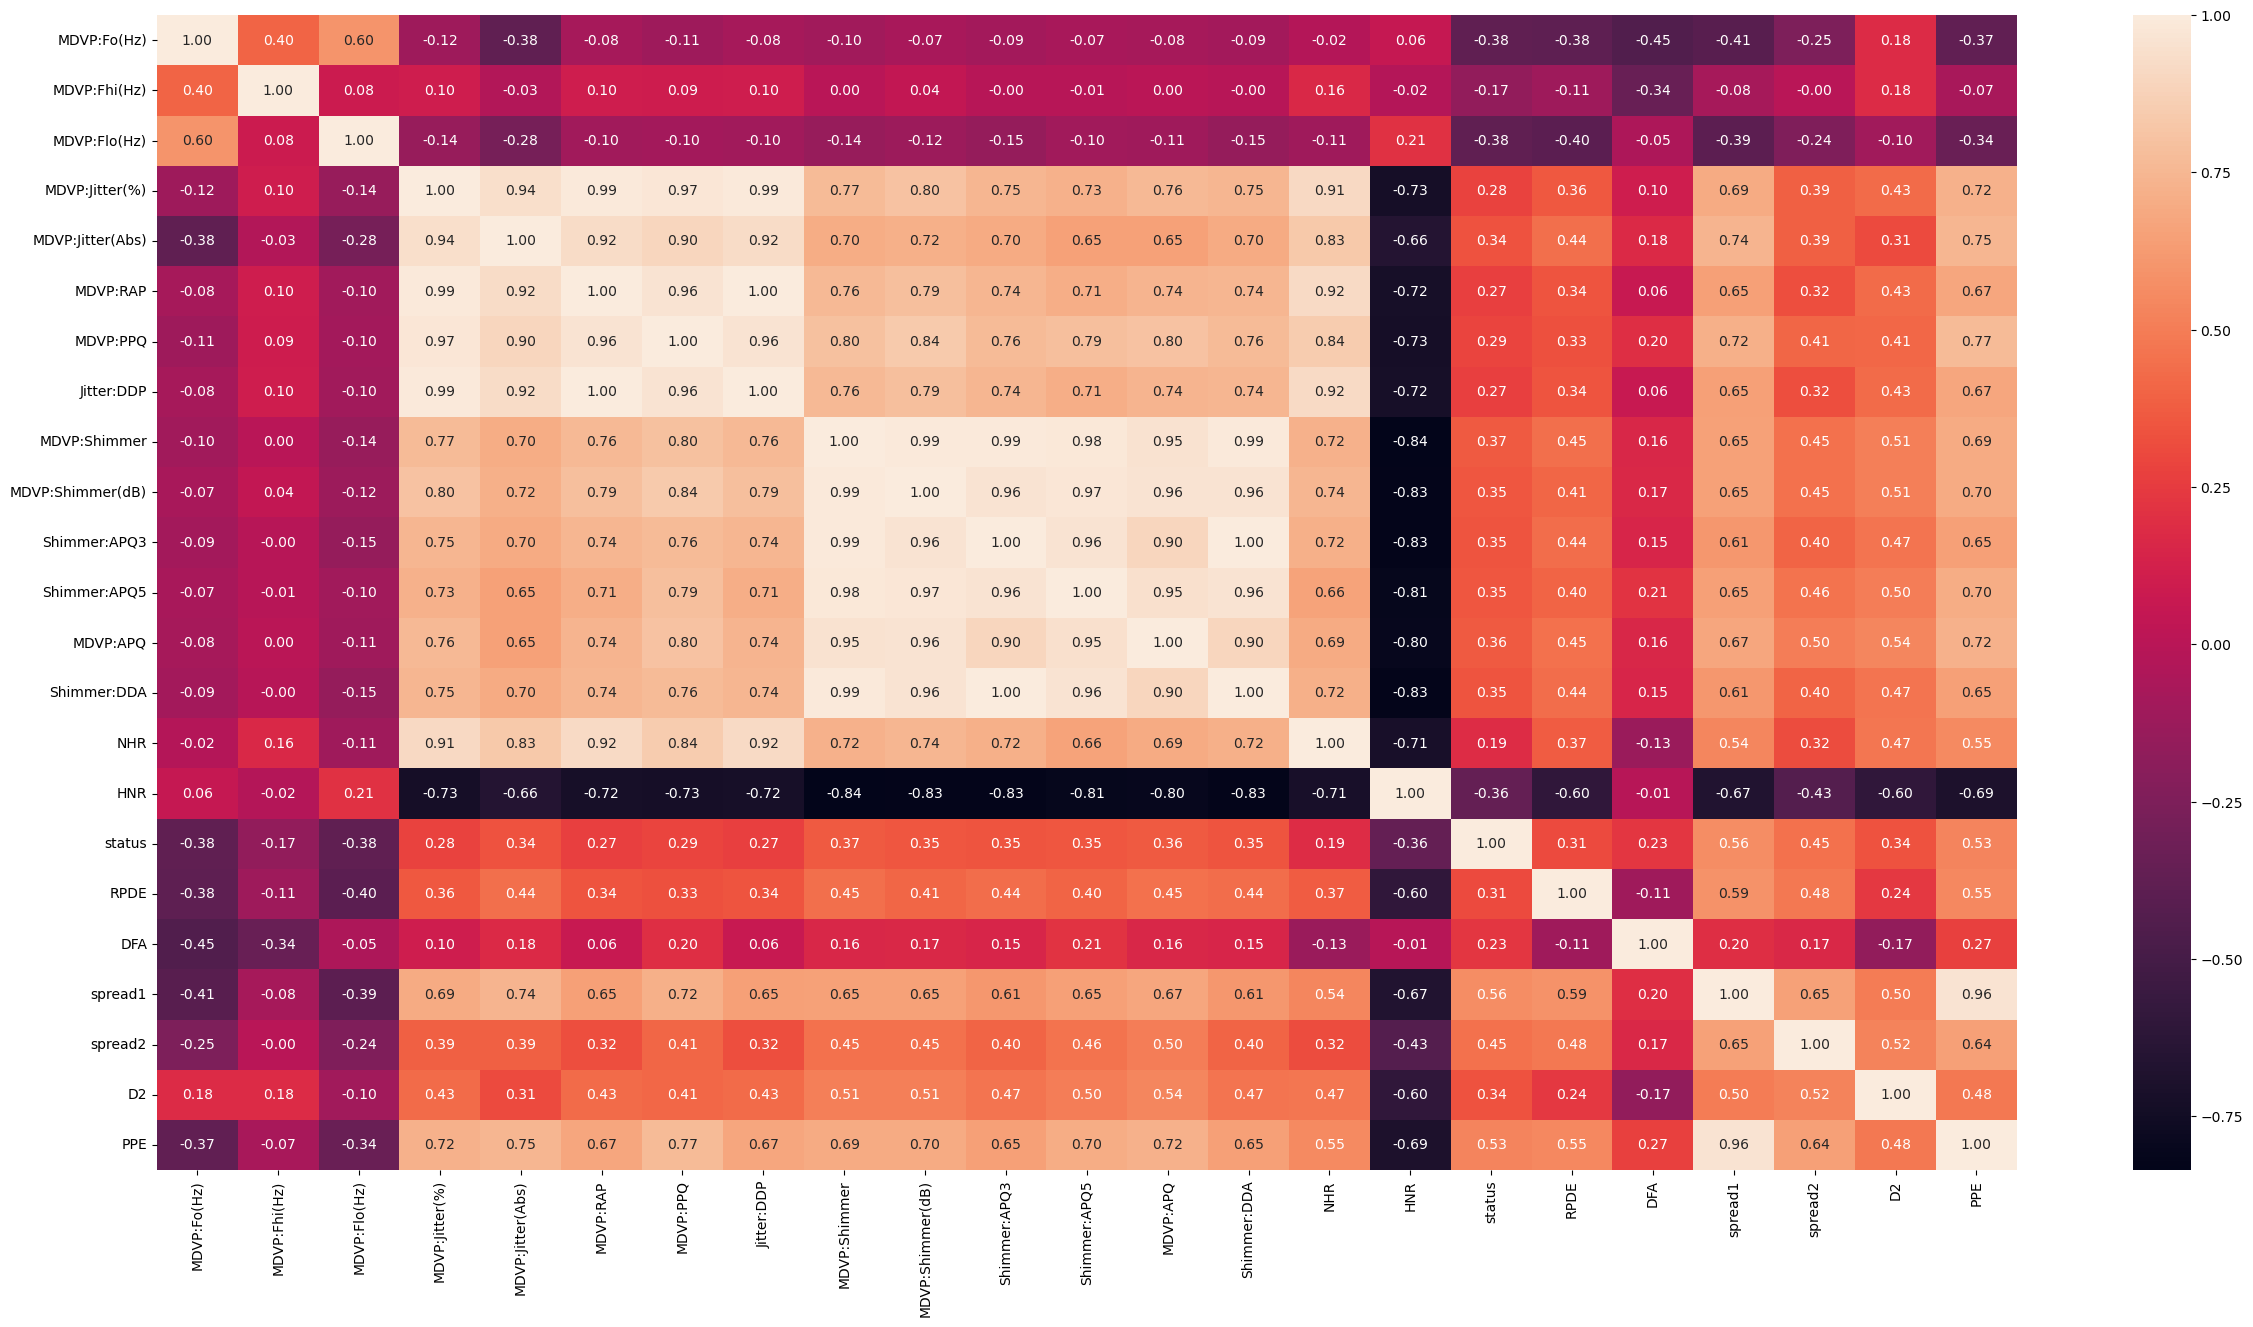

In [12]:
# figure size
plt.figure(figsize=(30, 15))
# feature selection
# correlation matrix
dataplot = sns.heatmap(data.corr(), annot=True, fmt='.2f')  
#The code data.corr() is used to calculate the correlation between columns in a pandas DataFrame named data.
# It returns a new DataFrame containing the correlation values.

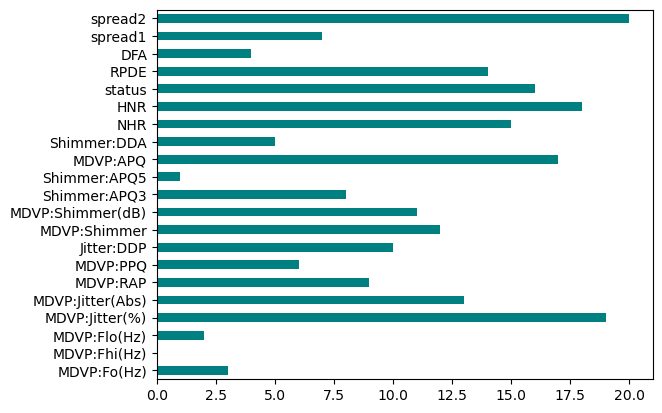

In [13]:
# feature selection
'''Fisher score is one of the most widely used supervised feature selection methods.'''
# Calculating Fisher scores
score = fisher_score.fisher_score(X, Y)
# Plotting the ranks
feat_importances = pd.Series (score, data.columns [0:len (data.columns) -2])
feat_importances.plot (kind='barh', color = 'teal')
plt.show()

In [14]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
'''here x data will be split in train and test data x_train represent training data and is corresponding 
label is store in y_train same for x_test
here we use 20% data as testing data and 80% as training data '''

print(x.shape, x_train.shape, x_test.shape)

(195, 22) (156, 21) (39, 21)


In [16]:
'''It applies the scaling transformation to the features of x_train (or x_test) based 
on the scaling parameters learned from the training data.'''

scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
#calculating value of K
import math
n_value=int(math.sqrt(len(y_test)))
print(n_value)

6


In [18]:
# training the KNN model (k-nearest neighbors Classifier)

knnmodel = KNeighborsClassifier(n_neighbors=6) 
knnmodel.fit(x_train, y_train) 
knnpredict = knnmodel.predict(x_test)

In [19]:
# training the XGB model (Extreme Gradient Boosting)
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train, y_train)
XGBpredict = XGBmodel.predict(x_test)

In [20]:
# training the SVM (suppport vector model)
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(x_train, y_train) # training the SVM model with training data 
svmpredict = svmmodel.predict(x_test)

In [21]:
print(f'The Mean Absolute Error of XGBClassifier() is:{metrics.mean_absolute_error(y_test, XGBpredict): .2f}')
print(f'The root Mean Squared Error of XGBClassifier() is:{np.sqrt(metrics.mean_squared_error(y_test, XGBpredict)): .2f}')

The Mean Absolute Error of XGBClassifier() is: 0.08
The root Mean Squared Error of XGBClassifier() is: 0.28


In [22]:
print(f'The Mean Absolute Error of SVM model is:{metrics.mean_absolute_error(y_test, svmpredict): .2f}')
print(f'The root Mean Squared Error of SVM model is:{np.sqrt(metrics.mean_squared_error(y_test, svmpredict)): .2f}')

The Mean Absolute Error of SVM model is: 0.08
The root Mean Squared Error of SVM model is: 0.28


In [23]:
print(f'The Mean Absolute Error of KNN model is:{metrics.mean_absolute_error(y_test, knnpredict): .2f}')
print(f'The root Mean Squared Error of KNN model is:{np.sqrt(metrics.mean_squared_error(y_test, knnpredict)): .2f}')

The Mean Absolute Error of KNN model is: 0.10
The root Mean Squared Error of KNN model is: 0.32


In [24]:
knn_accuracy_score = accuracy_score(y_test, knnpredict)*100
knn_f1_score = f1_score(y_test,knnpredict)
svm_accuracy_score = accuracy_score(y_test, svmpredict)*100
svm_f1_score = f1_score(y_test,svmpredict)
XGB_accuracy_score = accuracy_score(y_test, XGBpredict)*100
XGB_f1_score = f1_score(y_test,XGBpredict)

print("f1_score for knn model is:",knn_f1_score)
print("f1_score for XGB model is:",XGB_f1_score)
print("f1_score for svm model is:",svm_f1_score)
print("accuracy_score for knn model is:",knn_accuracy_score)
print("accuracy_score for XGBClassifier model is:",XGB_accuracy_score)
print("accuracy_score for svm model is:",svm_accuracy_score)

f1_score for knn model is: 0.9310344827586207
f1_score for XGB model is: 0.9473684210526316
f1_score for svm model is: 0.9473684210526316
accuracy_score for knn model is: 89.74358974358975
accuracy_score for XGBClassifier model is: 92.3076923076923
accuracy_score for svm model is: 92.3076923076923


Text(0.5, 1.0, 'Output Confusion Matrix For KNNClassifier')

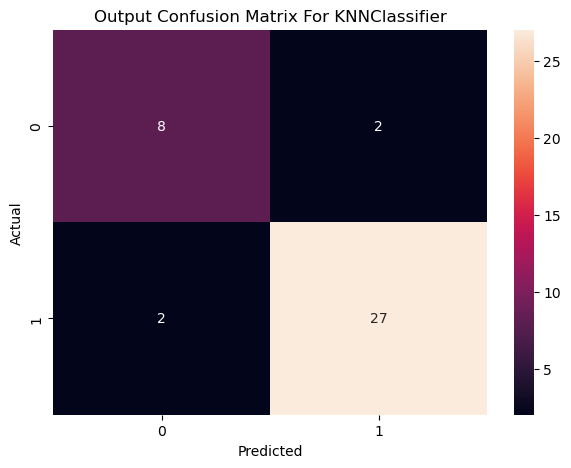

In [25]:
cm=confusion_matrix(y_test ,knnpredict)
plt.figure(figsize=(7,5))

fg=sns.heatmap(cm,annot=True)
figure=fg.get_figure()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix For KNNClassifier")

Text(0.5, 1.0, 'Output Confusion Matrix For XGBClassifier')

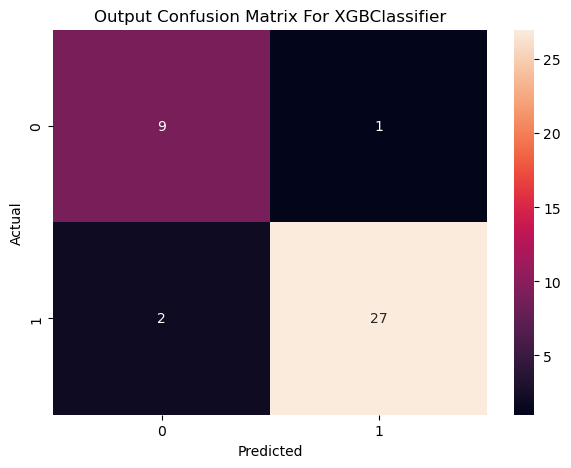

In [26]:
cm=confusion_matrix(y_test ,XGBpredict)
plt.figure(figsize=(7,5))

fg=sns.heatmap(cm,annot=True)
figure=fg.get_figure()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix For XGBClassifier")

Text(0.5, 1.0, 'Output - Confusion Matrix for SVMClassifier')

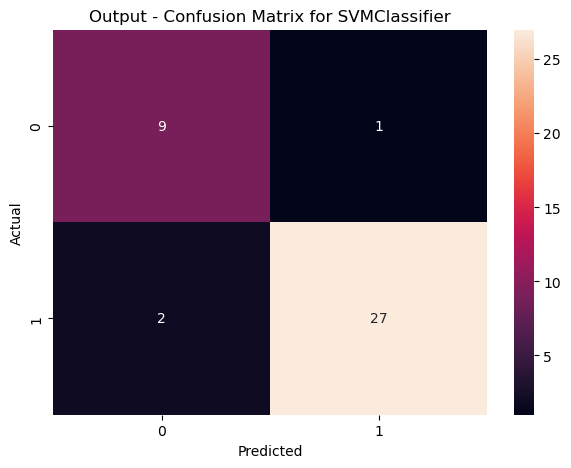

In [27]:
cm=confusion_matrix(y_test ,svmpredict)
plt.figure(figsize=(7,5))

fg=sns.heatmap(cm,annot=True)
figure=fg.get_figure()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output - Confusion Matrix for SVMClassifier")

In [28]:
pd.DataFrame({'Actual': y_test, 'XGBPredict': XGBpredict, 'svmPredict': svmpredict,'knnPredict': knnpredict})

,Actual,XGBPredict,svmPredict,knnPredict
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,1,1


In [29]:
#Finding best model for test size 0.1 and given dataset 
highest = max(knn_accuracy_score, XGB_accuracy_score, svm_accuracy_score)
print("The highest accuracy_score is:", highest)
def find_model(a, b, c, d):
    if d == a: print("Using k-nearest neighbors Classifier model")
    if d == b: print("Using Extreme Gradient Boosting Classifier model")
    if d == c: print("Using support vector model Classifier")
find_model(knn_accuracy_score, XGB_accuracy_score, svm_accuracy_score, highest)



The highest accuracy_score is: 92.3076923076923
Using Extreme Gradient Boosting Classifier model
Using support vector model Classifier
